In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import os
from math import sqrt

In [45]:
#Read the datasets
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [3]:
#Check the dataset
train_df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [4]:
len(train_df)

137

In [5]:
#Drop NA values from dataset
train_df= train_df.dropna()

In [6]:
#Check for null values in columns
train_df.isnull().any()

Id            False
Open Date     False
City          False
City Group    False
Type          False
P1            False
P2            False
P3            False
P4            False
P5            False
P6            False
P7            False
P8            False
P9            False
P10           False
P11           False
P12           False
P13           False
P14           False
P15           False
P16           False
P17           False
P18           False
P19           False
P20           False
P21           False
P22           False
P23           False
P24           False
P25           False
P26           False
P27           False
P28           False
P29           False
P30           False
P31           False
P32           False
P33           False
P34           False
P35           False
P36           False
P37           False
revenue       False
dtype: bool

In [7]:
train_df.shape


(137, 43)

In [8]:
#Check distribution of target variable
train_df["revenue"].describe()

count    1.370000e+02
mean     4.453533e+06
std      2.576072e+06
min      1.149870e+06
25%      2.999068e+06
50%      3.939804e+06
75%      5.166635e+06
max      1.969694e+07
Name: revenue, dtype: float64

Text(0, 0.5, 'Frequency')

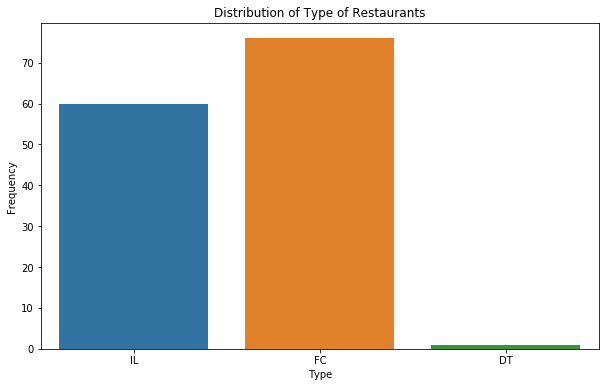

In [9]:
#Plot type of restaurants distribution
plt.figure(figsize=(10,6))
x= train_df["Type"]
ax = sns.countplot(x,data=train_df)
plt.title('Distribution of Type of Restaurants')
plt.xlabel('Type')
plt.ylabel('Frequency')

In [10]:
train_df["Type"].value_counts()

FC    76
IL    60
DT     1
Name: Type, dtype: int64

Text(0, 0.5, 'Frequency')

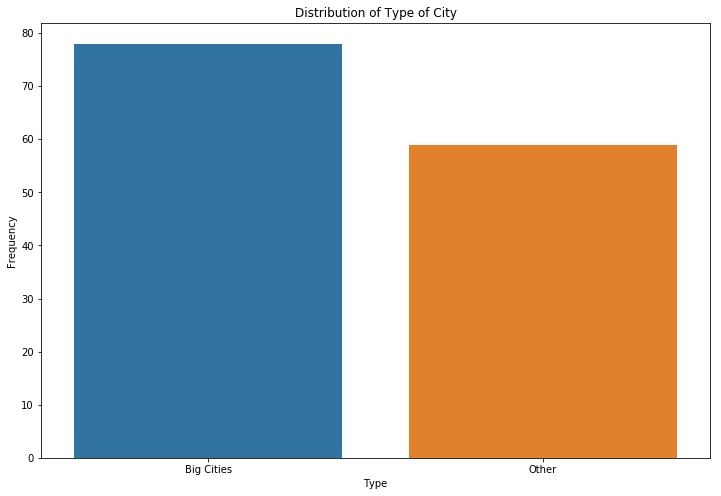

In [11]:
#Plot type of City distribution
plt.figure(figsize=(12,8))
ax = sns.countplot(x= train_df["City Group"],data=train_df)
plt.title('Distribution of Type of City')
plt.xlabel('Type')
plt.ylabel('Frequency')


In [46]:
#Split the 'Open Date' variable into Months and Year. 

train_df['Open Date'] = pd.to_datetime(train_df['Open Date'])
train_df['month'] = [x.month for x in train_df['Open Date']]
train_df['year'] = [x.year for x in train_df['Open Date']]
train_df.drop(['Id','Open Date'],axis=1,inplace=True)

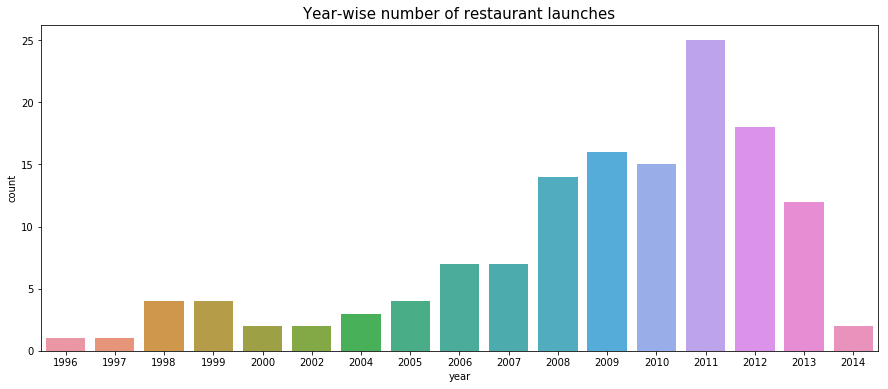

In [50]:
#Plot number of restaurant launches per year
plt.figure(figsize=(15,6))
sns.countplot(train_df['year'])
plt.title('Year-wise number of restaurant launches',fontsize=15);

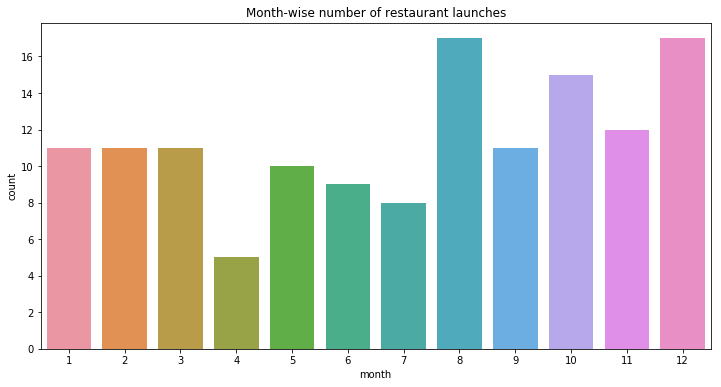

In [52]:
#Plot number of restaurant launches per month
plt.figure(figsize=(12,6))
sns.countplot(train_df['month'])
plt.title('Month-wise number of restaurant launches');

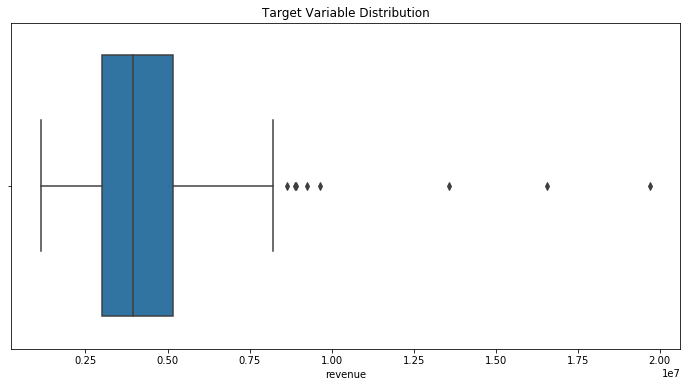

In [53]:
#Box plot of target-variable
plt.figure(figsize=(12,6))
sns.boxplot(train_df['revenue'])
plt.title('Target Variable Distribution')
plt.show()

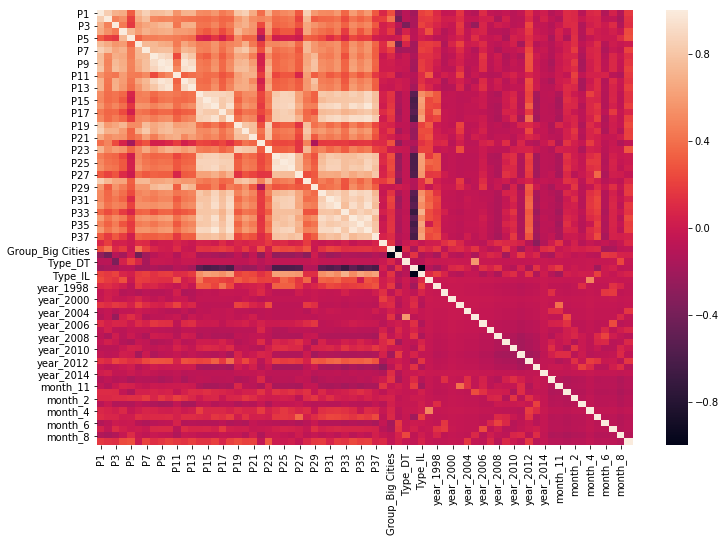

In [95]:
#Plot heatmap of the train dataset
plt.subplots(figsize=(12,8))
sns.heatmap(train_df.corr())

count    1.370000e+02
mean     4.453533e+06
std      2.576072e+06
min      1.149870e+06
25%      2.999068e+06
50%      3.939804e+06
75%      5.166635e+06
max      1.969694e+07
Name: revenue, dtype: float64


C:\Users\himanshu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0, 0.5, 'P(revenue)'), Text(0.5, 0, 'revenue')]

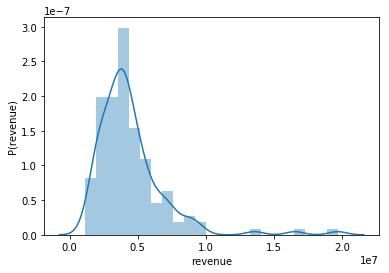

In [15]:
#Plot the distribution of the target variable
print(train_df['revenue'].describe())
sns.distplot(a=train_df['revenue'], kde=True).set(xlabel='revenue', ylabel='P(revenue)')

In [16]:
# sns.countplot(x='month',data=train_df)
# plt.figure(figsize=(13,5))
# sns.countplot(x='year',data=train_df)

In [18]:
# plt.figure(figsize=(12,8))
# x= train_df.groupby('year')['revenue'].mean().plot(legend=True)
# plt.title('Revenue vs year')
# plt.xlabel('Year of opening')
# plt.ylabel('Revenues')

In [54]:
# Apply one-hot-encoding dataframe to 'City Group' column
city_group = pd.get_dummies(train_df[["City Group"]], prefix = ['Group'])

train_df = pd.merge(train_df, city_group, left_index = True, right_index = True)

train_df.head(10)

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P33,P34,P35,P36,P37,revenue,month,year,Group_Big Cities,Group_Other
0,İstanbul,Big Cities,IL,4,5.00,4.00,4.00,2,2,5,...,5,5,4,3,4,5653753.00,7,1999,1,0
1,Ankara,Big Cities,FC,4,5.00,4.00,4.00,1,2,5,...,0,0,0,0,0,6923131.00,2,2008,1,0
2,Diyarbakır,Other,IL,2,4.00,2.00,5.00,2,3,5,...,0,0,0,0,0,2055379.00,3,2013,0,1
3,Tokat,Other,IL,6,4.50,6.00,6.00,4,4,10,...,6,18,12,12,6,2675511.00,2,2012,0,1
4,Gaziantep,Other,IL,3,4.00,3.00,4.00,2,2,5,...,2,3,4,3,3,4316715.00,5,2009,0,1
5,Ankara,Big Cities,FC,6,6.00,4.50,7.50,8,10,10,...,0,0,0,0,0,5017319.00,2,2010,1,0
6,İstanbul,Big Cities,IL,2,3.00,4.00,4.00,1,5,5,...,2,3,5,4,4,5166635.00,10,2010,1,0
7,İstanbul,Big Cities,IL,4,5.00,4.00,5.00,2,3,5,...,0,0,0,0,0,4491607.00,6,2011,1,0
8,Afyonkarahisar,Other,IL,1,1.00,4.00,4.00,1,2,1,...,3,4,5,4,5,4952497.00,8,2010,0,1
9,Edirne,Other,IL,6,4.50,6.00,7.50,6,4,10,...,0,0,0,0,0,5444227.00,11,2011,0,1


In [55]:
# Apply one-hot-encoding dataframe to 'Type' column
type = pd.get_dummies(train_df[["Type"]], prefix = ['Type'])
# Merge that one-hot-encoding dataframe to train_df
train_df = pd.merge(train_df, type, left_index = True, right_index = True)

In [56]:
#train_df.drop(columns=['Group_Big Cities_y','Group_Other_y'])

train_df.head(5)


,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P36,P37,revenue,month,year,Group_Big Cities,Group_Other,Type_DT,Type_FC,Type_IL
0,İstanbul,Big Cities,IL,4,5.00,4.00,4.00,2,2,5,...,3,4,5653753.00,7,1999,1,0,0,0,1
1,Ankara,Big Cities,FC,4,5.00,4.00,4.00,1,2,5,...,0,0,6923131.00,2,2008,1,0,0,1,0
2,Diyarbakır,Other,IL,2,4.00,2.00,5.00,2,3,5,...,0,0,2055379.00,3,2013,0,1,0,0,1
3,Tokat,Other,IL,6,4.50,6.00,6.00,4,4,10,...,12,6,2675511.00,2,2012,0,1,0,0,1
4,Gaziantep,Other,IL,3,4.00,3.00,4.00,2,2,5,...,3,3,4316715.00,5,2009,0,1,0,0,1


In [57]:
train_df.head()

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P36,P37,revenue,month,year,Group_Big Cities,Group_Other,Type_DT,Type_FC,Type_IL
0,İstanbul,Big Cities,IL,4,5.00,4.00,4.00,2,2,5,...,3,4,5653753.00,7,1999,1,0,0,0,1
1,Ankara,Big Cities,FC,4,5.00,4.00,4.00,1,2,5,...,0,0,6923131.00,2,2008,1,0,0,1,0
2,Diyarbakır,Other,IL,2,4.00,2.00,5.00,2,3,5,...,0,0,2055379.00,3,2013,0,1,0,0,1
3,Tokat,Other,IL,6,4.50,6.00,6.00,4,4,10,...,12,6,2675511.00,2,2012,0,1,0,0,1
4,Gaziantep,Other,IL,3,4.00,3.00,4.00,2,2,5,...,3,3,4316715.00,5,2009,0,1,0,0,1


In [58]:
# Apply One-hot encoding on month and year columns

train_df.year = train_df.year.astype(str)
train_df.month =train_df.month.astype(str)
year_dummy = pd.get_dummies(train_df[['year','month']],drop_first=True)
train_df = pd.concat([train_df,year_dummy],axis=1)
train_df.drop(['year','month'],axis=1, inplace=True)

In [59]:
train_df.head()

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
0,İstanbul,Big Cities,IL,4,5.00,4.00,4.00,2,2,5,...,0,0,0,0,0,0,0,1,0,0
1,Ankara,Big Cities,FC,4,5.00,4.00,4.00,1,2,5,...,0,0,1,0,0,0,0,0,0,0
2,Diyarbakır,Other,IL,2,4.00,2.00,5.00,2,3,5,...,0,0,0,1,0,0,0,0,0,0
3,Tokat,Other,IL,6,4.50,6.00,6.00,4,4,10,...,0,0,1,0,0,0,0,0,0,0
4,Gaziantep,Other,IL,3,4.00,3.00,4.00,2,2,5,...,0,0,0,0,0,1,0,0,0,0


In [60]:
# Remove outliers from dataset
train_df = train_df[train_df['revenue']<8.5e+06].copy()

In [61]:
len(train_df)

129

In [62]:
# Split target column from train-test
X=train_df.drop('revenue',axis=1)
y=train_df['revenue'][:129]

#Drop orignal categorical variables as One-hot encoding has been performed
X=X.drop(columns={'City Group','Type','City'})
X.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
0,4,5.00,4.00,4.00,2,2,5,4,5,5,...,0,0,0,0,0,0,0,1,0,0
1,4,5.00,4.00,4.00,1,2,5,5,5,5,...,0,0,1,0,0,0,0,0,0,0
2,2,4.00,2.00,5.00,2,3,5,5,5,5,...,0,0,0,1,0,0,0,0,0,0
3,6,4.50,6.00,6.00,4,4,10,8,10,10,...,0,0,1,0,0,0,0,0,0,0
4,3,4.00,3.00,4.00,2,2,5,5,5,5,...,0,0,0,0,0,1,0,0,0,0


In [63]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
col = X.columns

X = StandardScaler().fit_transform(X)
X= pd.DataFrame(X, columns=col)
X.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
0,0.01,0.42,-0.32,-0.35,-0.01,-0.61,-0.18,-0.64,-0.26,-0.28,...,-0.32,-0.38,-0.31,-0.29,-0.18,-0.29,-0.27,3.89,-0.39,-0.27
1,0.01,0.42,-0.32,-0.35,-0.82,-0.61,-0.18,-0.09,-0.26,-0.28,...,-0.32,-0.38,3.28,-0.29,-0.18,-0.29,-0.27,-0.26,-0.39,-0.27
2,-0.68,-0.24,-2.24,0.62,-0.01,-0.15,-0.18,-0.09,-0.26,-0.28,...,-0.32,-0.38,-0.31,3.45,-0.18,-0.29,-0.27,-0.26,-0.39,-0.27
3,0.70,0.09,1.61,1.59,1.60,0.32,1.98,1.54,2.49,2.45,...,-0.32,-0.38,3.28,-0.29,-0.18,-0.29,-0.27,-0.26,-0.39,-0.27
4,-0.33,-0.24,-1.28,-0.35,-0.01,-0.61,-0.18,-0.09,-0.26,-0.28,...,-0.32,-0.38,-0.31,-0.29,-0.18,3.45,-0.27,-0.26,-0.39,-0.27


In [87]:
###############   Random-Forest Regressor Model  #############################################

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Split data into training and testing sets
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Import model
from sklearn.ensemble import RandomForestRegressor

# Apply model with certain parameters
rf = RandomForestRegressor(max_depth = 10,
                                     max_features = 'sqrt',
                                     min_samples_leaf = 2,
                                    min_samples_split = 6,
                                    n_estimators = 100)
#Build the model
rf.fit(X_train, y_train)

#Prediction and calculation of errors(rmse - score)
from sklearn.metrics import mean_squared_error
y_train_pred = rf.predict(X_train)
y_pred = rf.predict(X_test)
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

#rms = (mean_squared_error(test_y, y_pred))
#print(rms)

Train RMSE: 1040352.0594
Test RMSE: 1392565.4173


In [85]:
# from sklearn.model_selection import GridSearchCV
# import xgboost as xgb

# #
# parameters = {  'max_depth' : [10,20,30],
#    'min_samples_leaf' : [2 ,4,6,10],
#     'max_features': ['sqrt', 0.25, 0.5, 0.75, 1.0],
#     'min_samples_split': [2, 4, 6],
#      'n_estimators' : [100,500,1000]}

# params = GridSearchCV(RandomForestRegressor(),
#                         parameters,
#                         cv = 5,
#                         n_jobs = 4,
#                         verbose=True)

# params.fit(X,y)

# print(params.best_score_)
# print(params.best_params_)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   28.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  3.1min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  5.7min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:  8.6min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed: 12.6min
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed: 17.0min
[Parallel(n_jobs=4)]: Done 2700 out of 2700 | elapsed: 19.0min finished


0.05805425944221587
{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 100}


In [65]:
pd.options.display.float_format = '{:.2f}'.format
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score
from sklearn.model_selection import cross_val_score

#Define model functions
regressors = {
    'Logistic Regression' : LogisticRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'K-nearest Neighbors' : KNeighborsRegressor()
}

#Loop for ecah model defined above
model_results=pd.DataFrame(columns=['MAE','MSE','RMSE'])
for method,func in regressors.items():
    #Build the model
    func.fit(X_train,y_train)
    #Prediction
    pred = func.predict(X_test)
    
    model_results.loc[method]= [mean_absolute_error(y_test,pred),
                          mean_squared_error(y_test,pred),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          
                         ]
model_results



C:\Users\himanshu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,MAE,MSE,RMSE
Logistic Regression,1795702.21,4715388460859.08,2171494.52
Decision Tree,1401314.95,3031347498885.67,1741076.53
K-nearest Neighbors,1102162.26,2233879322099.68,1494616.78


In [89]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

#SVR model
clf = SVR()
#Fit the model
clf.fit(X_train,y_train)
#Apply prediction
pred = clf.predict(X_test)

print(np.sqrt(mean_squared_error(y_test,pred)))


1505763.997196816


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text yticklabel objects>)

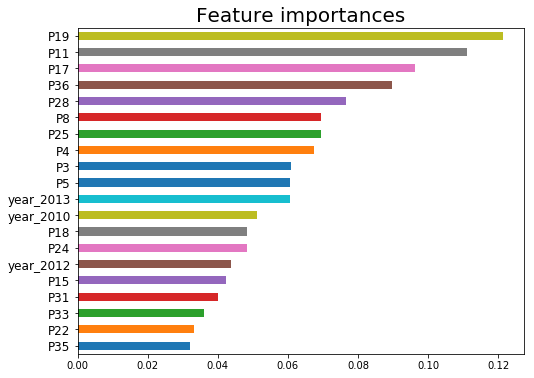

In [100]:
from sklearn.feature_selection import mutual_info_regression
plt.figure(figsize= [8,6])
pd.Series(mutual_info_regression(X, y), index= X.columns).sort_values(ascending=True).tail(20).plot(kind="barh")
plt.title("Feature importances", fontsize= 20)
plt.yticks(fontsize= 12)